# VK education. Практика в библиотеке sklearn

***Решаем задачу titanic c сайта kaggle. Датасет: https://www.kaggle.com/c/titanic/data***

### Часть 1. Загрузка и обработка данных

In [23]:
pip install numpy pandas matplotlib scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/c6/29/044048c5e911373827c0e1d3051321b9183b2a4f8d4e2f11c08fcff83f13/scikit_learn-1.5.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for scipy>=1.6.0 from https://files.pythonhosted.org/packages/8e/ee/8a26858ca517e9c64f84b4c7734b89bda8e63bec85c3d2f432d225bb1886/scipy-1.14.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 761.3 kB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/91/29/df4b9b42f2be0b623cbd5e2140cafcaa2bef0759a00b7b70104dcfe2fb51/joblib-1.4.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3-none-any.whl.m

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("train.csv", sep=",", low_memory=False)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Данные содержат:
- PassengerId - id пассажира
- Survived - отметка, выжил человек или нет -> **целевая переменная у**
- Pclass - класс каюты, в которой находился пассажир (1й - Верхний, 2й - Средний, 3й - Нижний)
- Name - имя пассажира
- Sex - пол пассажира
- Age - возраст пассажира
- SibSp - количество родственников на борту
- Parch - количество родителей/детей на борту
- Ticket - номер билета пассажира
- Fare - цена билета пассажира ($)
- Cabin - номер каюты пассажира
- Embarked - пункт посадки человека на корабль

Признаки PassengerId, Name и Ticket в данной задаче не представляют интереса

In [5]:
data = data.drop(["PassengerId", "Name", "Ticket"], axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [6]:
y_true = data["Survived"]
data = data.drop(["Survived"], axis=1)

In [7]:
data.isna().any(axis=0)

Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Cabin        True
Embarked     True
dtype: bool

#### Пропуски есть в колонках Age, Cabin, Embarked -> их нужно заполнить

##### 1. **Age**

In [8]:
mean_age = int(data["Age"].mean())
data["Age"] = data["Age"].fillna(mean_age)

##### 2. **Embarked**

In [9]:
data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [10]:
data["Embarked"] = data["Embarked"].fillna("S")


##### 3. **Cabin**

In [11]:
int(data["Cabin"].isna().sum()), len(data["Cabin"])

(687, 891)

In [12]:
data = data.drop(["Cabin"], axis=1)

Все признаки имеют числовой формат, за исключением Sex, Embarked -> их необходимо переделать в числа

In [13]:
data = data.astype({'Sex': 'category'})
data["Sex"] = data["Sex"].cat.codes
# data.Sex = data.Sex.map(dict(male = 1, female = 0))

In [15]:
data = pd.get_dummies(data, columns=["Embarked"])

In [16]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,False,False,True
1,1,0,38.0,1,0,71.2833,True,False,False
2,3,0,26.0,0,0,7.9250,False,False,True
3,1,0,35.0,1,0,53.1000,False,False,True
4,3,1,35.0,0,0,8.0500,False,False,True


In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, y_true, test_size=0.3, shuffle=True)

### Часть 2. Обучение модели

In [68]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [69]:
models_scores = []
for k in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    models_scores.append([accuracy, k])

In [110]:
max(models_scores)

[0.746268656716418, 18]

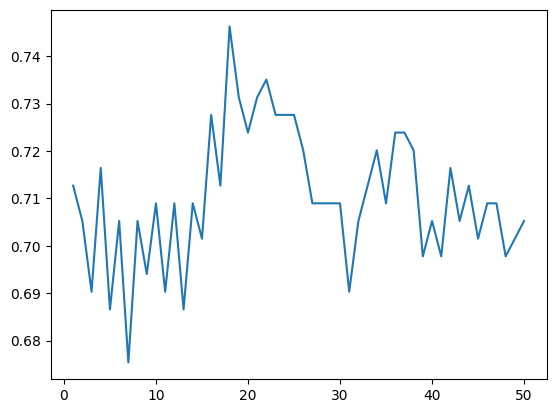

In [71]:
plt.plot(list(range(1, 51)), [score[0] for score in models_scores])

### Часть 3. Применяем модель к тестовым данным

In [100]:
test_data = pd.read_csv('test.csv', sep=',', low_memory=False)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [101]:
test_data = test_data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [102]:
test_data.isna().any()

Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare         True
Embarked    False
dtype: bool

In [103]:
test_data["Age"] = test_data["Age"].fillna(test_data["Age"].median())

In [104]:
test_data["Fare"] = test_data["Fare"].fillna(int(test_data["Fare"].mean()))

In [105]:
test_data.isna().any()

Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [106]:
test_data.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [107]:
test_data.Sex = test_data.Sex.astype("category")
test_data.Sex = test_data.Sex.cat.codes

In [108]:
test_data = pd.get_dummies(test_data, columns=["Embarked"], dtype=int)

In [109]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,7.8292,0,1,0
1,3,0,47.0,1,0,7.0000,0,0,1
2,2,1,62.0,0,0,9.6875,0,1,0
3,3,1,27.0,0,0,8.6625,0,0,1
4,3,0,22.0,1,1,12.2875,0,0,1


In [111]:
knn = KNeighborsClassifier(n_neighbors=18)

In [112]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=18)

In [115]:
pred_ans = knn.predict(test_data)